<a href="https://colab.research.google.com/github/WesleySouza13/Classifica-o-Bin-ria-com-o-torch-/blob/main/Classifica%C3%A7%C3%A3o_binaria_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BASE BREST CANCER

esse dataset possui dados de uma clinica que trata pacientes que podem desenvolver cancer ou não. Com isso ja temos nosso caso de estudo: Definir com base a esses dados, quais pacientes estão propensos a desenvolver um tumor maligno ou benigno. É um estudo simples, apenas para relembrar sobre o assunto classificação e os recursos do Torch

# importação das Bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import torch
torch.__version__

'2.3.1+cu121'

In [ ]:
import torch.nn as nn

# base de dados

In [ ]:
np.random.seed(123) #definindo a semnete geradora aleatoria, sempre tera os mesmos resultados
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv') #caracteristicas do tumor
classe = pd.read_csv('/content/saidas_breast.csv') #resposta se é maligno ou benigno

In [ ]:
previsores.shape

(569, 30)

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.shape

(569, 1)

In [ ]:
np.unique(classe)

array([0, 1])

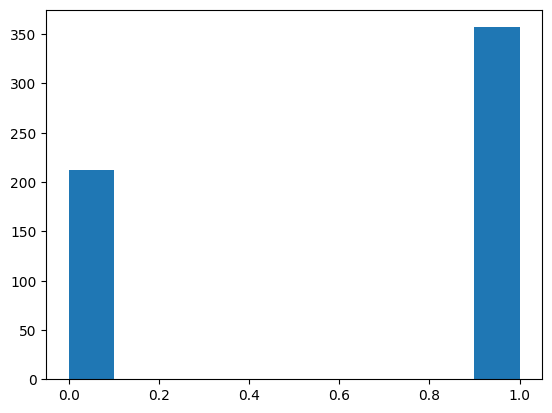

In [ ]:
plt.hist(classe)
plt.show()

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.3)

In [ ]:
previsores_treinamento.shape, previsores_teste.shape

((398, 30), (171, 30))

In [ ]:
classe_treinamento.shape, classe_teste.shape

((398, 1), (171, 1))

# transformação de dados para tensores

In [ ]:
#variaveis treinamento
type(np.array(previsores_treinamento))
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
type(np.array(classe_treinamento))
classe_treinamento = torch.tensor(np.array(classe_treinamento),dtype=torch.float)

In [ ]:
#criar dataset
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

# Construção do modelo

In [ ]:
# vamos criar um neuronio com as seguintes caracteristicas: 30 entradas -> 16 neuronios na primeira camada oculta -> 16 neuronioos na segunda camada -> 1 saída( sendo ela 0 ou 1(sim ou não))
#cocmo cheguei a esses calculos? (30 entradas + 1 saída)/2 = 15.5 = 16

In [ ]:
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

# treinamento do modelo


In [ ]:
for epoch in range(100):
  running_loss = 0

  for data in train_loader:
    inputs, labels = data
    optimizer.zero_grad()

    outputs = classificador(inputs)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    print(f'epoch {epoch+1}, loss: {running_loss/len(train_loader)}')

epoch 1, loss: 0.3355280637741089
epoch 1, loss: 0.4721828937530518
epoch 1, loss: 0.711544418334961
epoch 1, loss: 0.7491117626428604
epoch 1, loss: 0.9365111142396927
epoch 1, loss: 1.1079816609621047
epoch 1, loss: 1.131772342324257
epoch 1, loss: 1.4233633428812027
epoch 1, loss: 1.5665338665246964
epoch 1, loss: 1.7328861743211745
epoch 1, loss: 1.931214228272438
epoch 1, loss: 1.9668385416269303
epoch 1, loss: 2.394089785218239
epoch 1, loss: 2.4917344003915787
epoch 1, loss: 2.551569303870201
epoch 1, loss: 2.7162377685308456
epoch 1, loss: 2.7444292485713957
epoch 1, loss: 2.7565019726753235
epoch 1, loss: 3.3959254384040833
epoch 1, loss: 3.4106867954134943
epoch 1, loss: 3.4416222646832466
epoch 1, loss: 3.4710561648011207
epoch 1, loss: 3.476400999724865
epoch 1, loss: 3.486099302023649
epoch 1, loss: 3.6374687783420088
epoch 1, loss: 3.638236782699823
epoch 1, loss: 3.651670805364847
epoch 1, loss: 3.7637329496443273
epoch 1, loss: 3.8206242121756078
epoch 1, loss: 3.833186

# Vizualização dos pesos

In [ ]:
paramns = list(classificador.parameters())
paramns

[Parameter containing:
 tensor([[-9.9814e-02,  1.2455e-04, -1.7202e-01,  1.2025e-01,  1.9353e-01,
           2.8470e-02, -1.8037e-01,  7.0639e-02,  1.2528e-01, -5.3313e-03,
           1.5468e-01,  1.0530e-01, -1.2151e-01,  6.1039e-02, -4.2231e-03,
           4.5281e-02,  2.4412e-01,  8.8519e-02, -3.5889e-01, -6.6261e-02,
           4.3253e-02, -5.0398e-02,  9.2243e-02,  1.0819e-01,  1.6583e-01,
           1.8216e-01, -3.7547e-01, -7.6184e-02, -4.4600e-01, -1.7554e-01],
         [ 1.2417e-01, -2.8941e-01,  1.5504e-02, -6.5080e-02,  3.5329e-02,
          -4.5955e-02, -3.1500e-02, -1.7017e-01, -1.7607e-01, -2.9319e-02,
           1.9324e-02, -3.8850e-02, -1.3717e-01, -9.8292e-02, -5.6786e-03,
          -7.8092e-02, -7.7053e-03, -1.5271e-01,  2.8701e-01, -3.0002e-03,
           9.0469e-02, -1.1133e-03,  8.6054e-02,  1.3040e-01,  6.0228e-02,
           3.6482e-02, -2.0550e-01,  1.3366e-01,  3.9057e-02,  4.2982e-02],
         [-6.5250e-02,  4.8468e-02, -1.5862e-02, -3.9062e-02,  5.5751e-06,


In [ ]:
pesos0 = paramns[0]
pesos0.shape

torch.Size([16, 30])

In [ ]:
bias = paramns[1]
bias.shape

torch.Size([16])

# avaliação do modelo

In [ ]:
#utilizando a base de dados de teste

In [ ]:
classificador.eval() #muda o projeto para o modo de avaliação

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(np.array(previsores_teste))
previsores_teste = torch.tensor(np.array(previsores_teste), dtype = torch.float)
previsores_teste.type

<function Tensor.type>

In [ ]:
previsao = classificador.forward(previsores_teste)
previsao

tensor([[7.4935e-01],
        [9.8201e-01],
        [2.8034e-02],
        [4.7503e-06],
        [2.3605e-02],
        [1.0000e+00],
        [4.4489e-01],
        [1.0000e+00],
        [9.7666e-01],
        [8.0100e-01],
        [1.9004e-17],
        [9.7707e-01],
        [7.3336e-02],
        [1.0000e+00],
        [9.9953e-01],
        [1.0000e+00],
        [9.9988e-01],
        [9.9998e-01],
        [4.3864e-17],
        [1.0000e+00],
        [1.0000e+00],
        [9.8827e-01],
        [1.0000e+00],
        [4.2610e-05],
        [7.4430e-01],
        [9.9416e-01],
        [1.0000e+00],
        [4.1136e-10],
        [8.8227e-01],
        [1.9006e-01],
        [9.9634e-01],
        [1.5623e-06],
        [9.7217e-01],
        [7.7115e-11],
        [1.0258e-05],
        [8.9330e-04],
        [9.9976e-01],
        [9.8029e-01],
        [3.6723e-01],
        [7.4706e-01],
        [1.7557e-03],
        [2.2355e-01],
        [1.7012e-08],
        [8.6645e-01],
        [9.9999e-01],
        [3

In [ ]:
previsao = np.array(previsao > 0.5)
previsao

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [

In [ ]:
taxa_acerto = accuracy_score(classe_teste, previsao)
taxa_acerto

0.8713450292397661

In [ ]:
matriz = confusion_matrix(classe_teste, previsao)


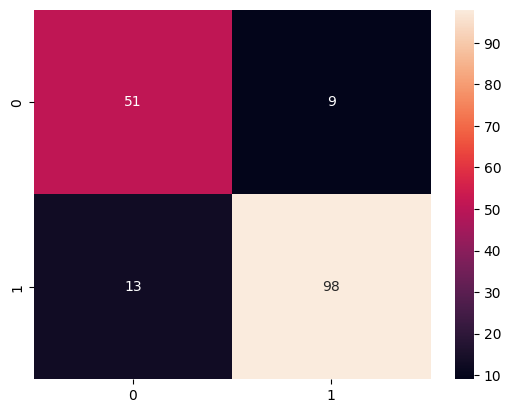

In [ ]:
sns.heatmap(matriz, annot = True, fmt='d')
plt.show()